# Sloan Digital Sky Survey

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Importing the required libraries as shown below

Data Analysing

Data Visualization

Electronic design automation (EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Here we inserted a image of SDSS LOGO

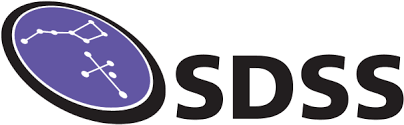

In [3]:
from IPython.display import Image
Image(filename = "C:\projectdata\img\sdss1.png", width = 1200, height = 100)


In [4]:
da=pd.read_csv('sdss.csv')
da

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Dataset description

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiber ID

In [5]:
#Finding the null values and data types of the datset

da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
#Finding the null value in the dataset  

da.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
# THis is used to find if there are any ? marks in the dataset

da[da.isin(["?"]).any(axis=1)]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


In [8]:
#Finding the null value in the dataset  

da.isnull().any()

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

In [9]:
#To get the descriptive analysis 

da.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [10]:
# Finding the un-unique values in each and every column

da.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [11]:
# Thses are the columns of dataset
da.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Data Visualization

Univariate Analysis

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


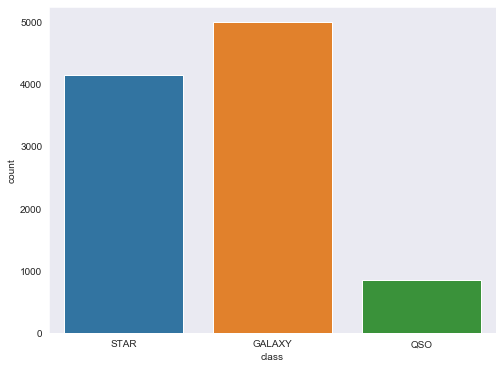

In [12]:
print(da['class'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
sb.countplot(da['class'])

Here Galaxy has highest number in the class graph as shown above

In [13]:
da['class']=da['class'].map({'STAR':1,'GALAXY':2,'QSO':3})

2    4998
1    4152
3     850
Name: class, dtype: int64


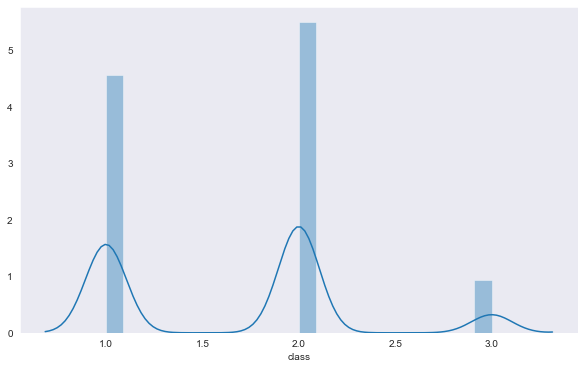

In [14]:
print(da['class'].value_counts())
plt.figure(figsize=(10,6))
sb.set_style('dark')
sb.distplot(da['class'])

 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64


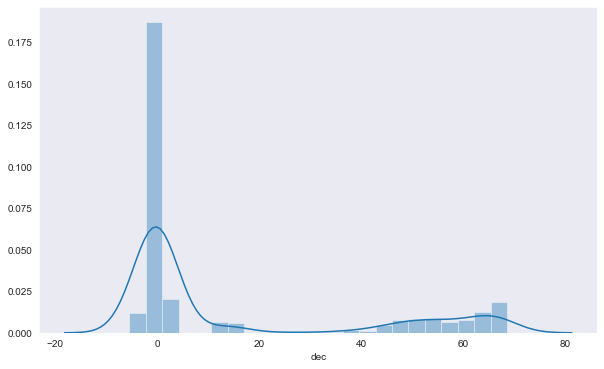

In [15]:
print(da['dec'].value_counts())
plt.figure(figsize=(10,6))
sb.set_style('dark')
sb.distplot(da['dec'])

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


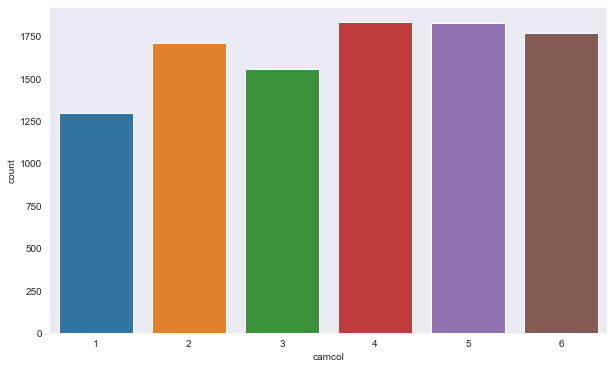

In [16]:
print(da['camcol'].value_counts())
plt.figure(figsize=(10,6))
sb.set_style('dark')
sb.countplot(da['camcol'])

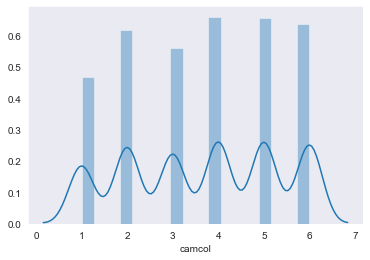

In [17]:
sb.distplot(da['camcol'])

 0.000000    19
-0.000020     6
-0.000062     5
-0.000010     4
-0.000033     4
             ..
 0.060941     1
 1.269727     1
 1.912334     1
-0.000522     1
-0.000424     1
Name: redshift, Length: 9637, dtype: int64


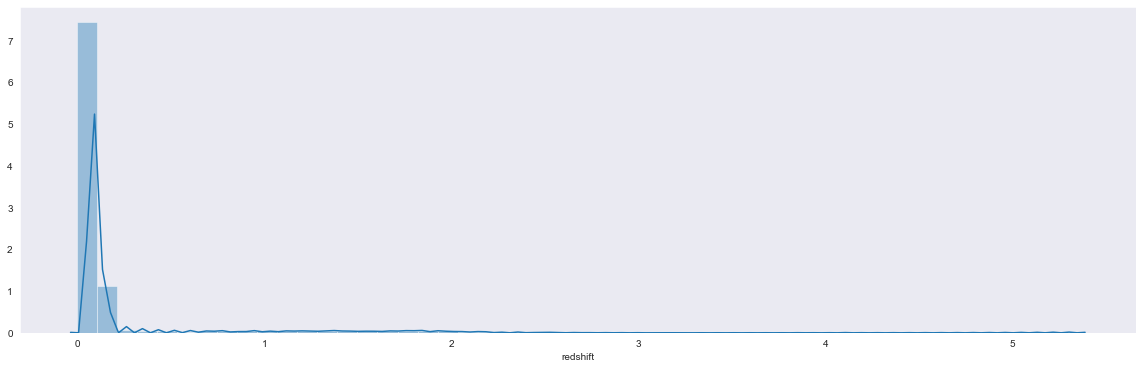

In [18]:
print(da['redshift'].value_counts())
plt.figure(figsize=(20,6))
sb.set_style('dark')
sb.distplot(da['redshift'])

52000    312
54140    222
51909    222
54208    221
51908    214
        ... 
53299      1
55618      1
56991      1
51696      1
53053      1
Name: mjd, Length: 355, dtype: int64


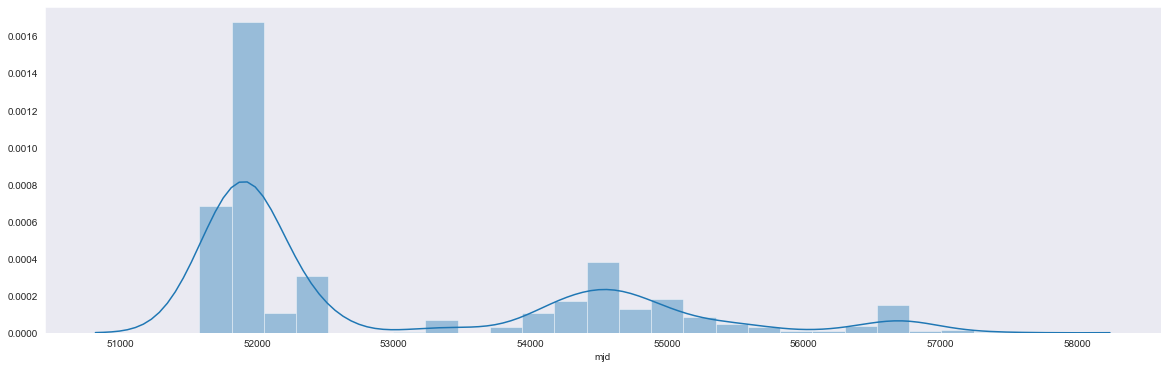

In [19]:
print(da['mjd'].value_counts())
plt.figure(figsize=(20,6))
sb.set_style('dark')
sb.distplot(da['mjd'])

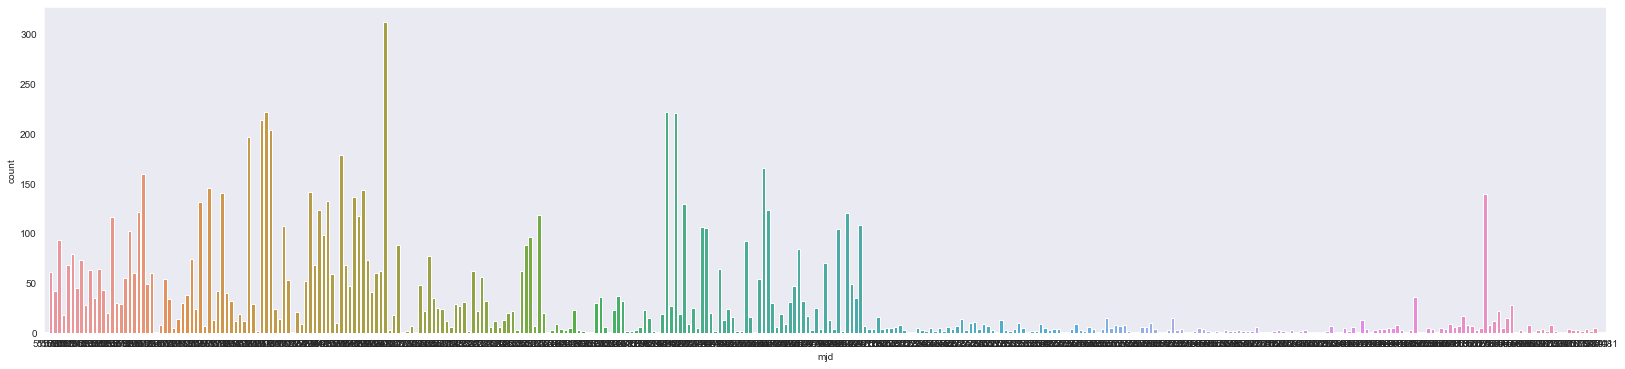

In [20]:
plt.figure(figsize=(28,6))
sb.countplot(da['mjd'])

Bivariate Analysis

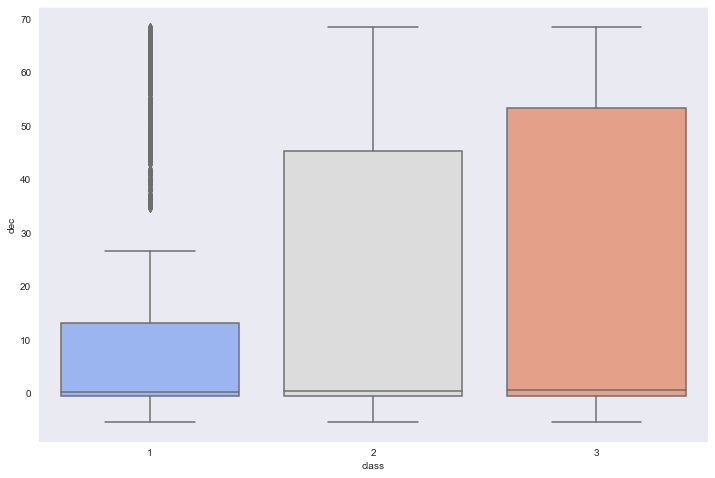

In [21]:
plt.figure(figsize=(12,8))
sb.boxplot(x='class',y='dec',data=da, palette='coolwarm')

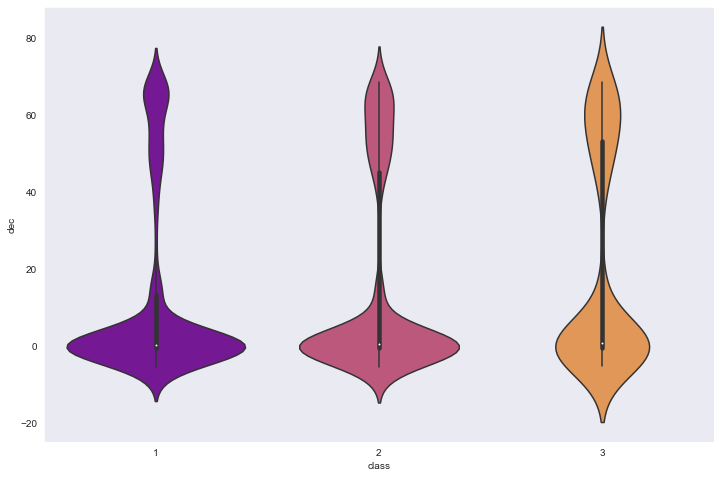

In [22]:
plt.figure(figsize=(12,8))
sb.violinplot(x='class',y='dec',data=da,palette='plasma')

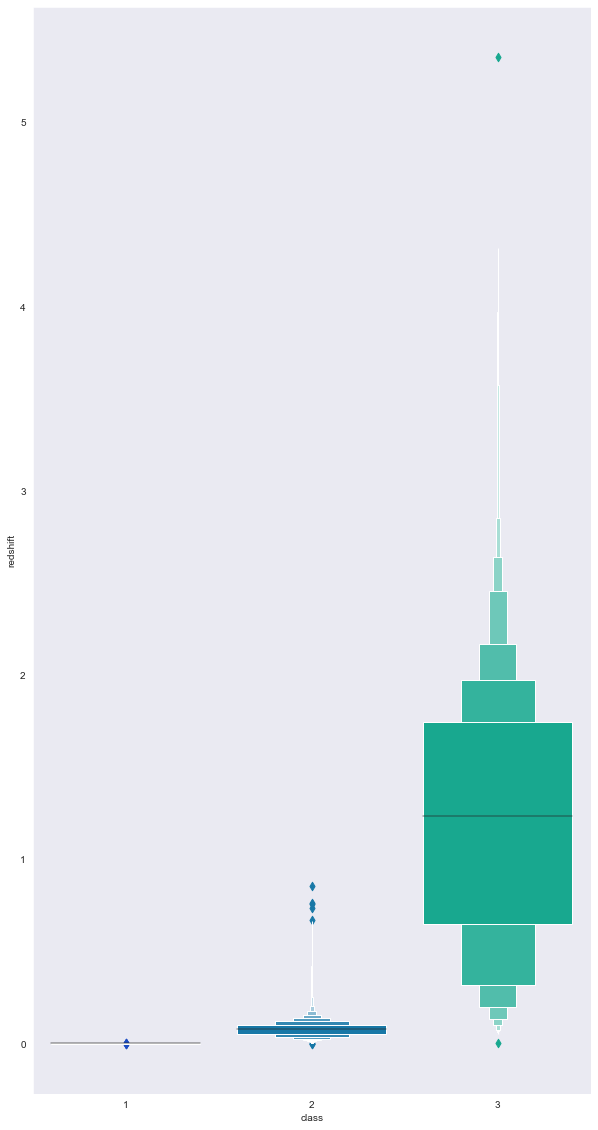

In [23]:
plt.figure(figsize=(10,20))
sb.boxenplot(x='class',y='redshift',data=da,palette='winter')

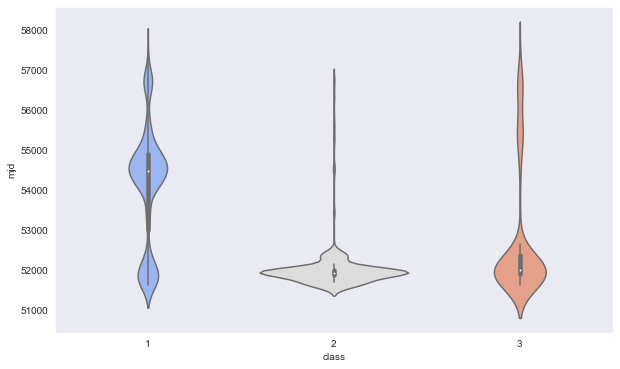

In [24]:
plt.figure(figsize=(10,6))
sb.violinplot(x='class',y='mjd',data=da,palette='coolwarm')

In [25]:
# the Correlation between the different variables

da.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#droping the unwanted columns 

da.drop(['objid','rerun','field','specobjid','fiberid','run','camcol'],axis=1,inplace=True)

In [27]:
da

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,1,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,1,0.000590,3306,54922
...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,2,0.027583,447,51877
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,2,0.117772,447,51877
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1,-0.000402,7303,57013
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,2,0.014019,447,51877


In [28]:
# the Correlation between the different variables
#after removing the coluns
da.corr()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.041189,0.030307,-0.095329,-0.086887
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.091249,0.067021,0.088342,0.066147
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.284541,0.163741,-0.129430,-0.168793
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.357352,0.407576,-0.054981,-0.092772
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.278678,0.441080,0.019787,-0.009345
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.205367,0.431450,0.072958,0.050896
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.149444,0.424034,0.112397,0.095658
class,0.041189,0.091249,0.284541,0.357352,0.278678,0.205367,0.149444,1.000000,0.621046,-0.466004,-0.527803
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,0.621046,1.000000,-0.038091,-0.057957
plate,-0.095329,0.088342,-0.129430,-0.054981,0.019787,0.072958,0.112397,-0.466004,-0.038091,1.000000,0.966881


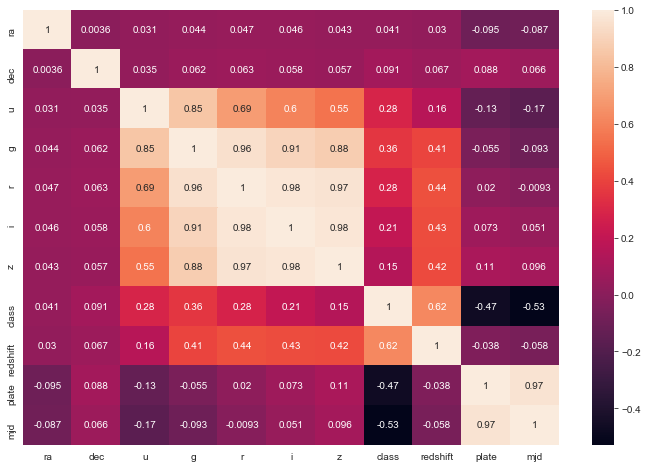

In [29]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,8))
sb.heatmap(da.corr(),annot=True)

<Figure size 864x576 with 0 Axes>

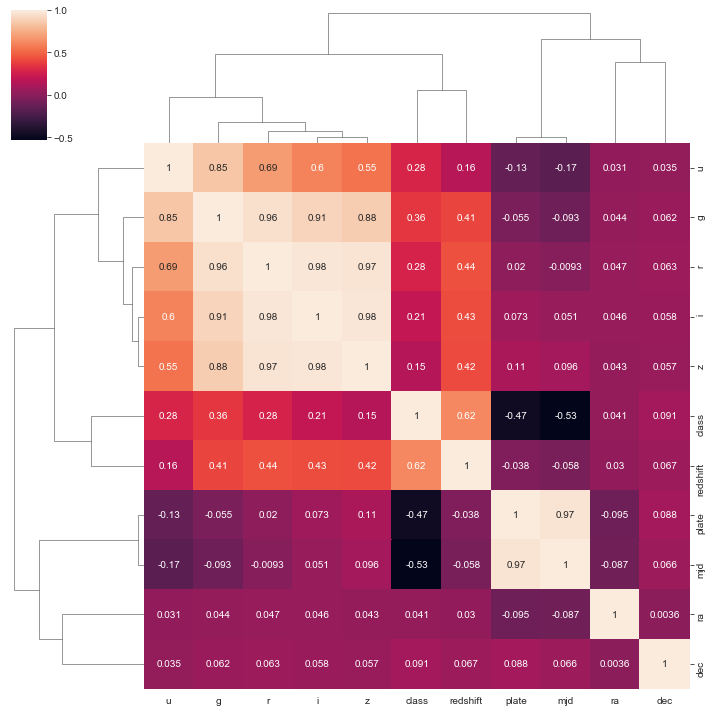

In [30]:
# This clustermap shows the Correlation between the different variables

plt.figure(figsize=(12,8))
sb.clustermap(da.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

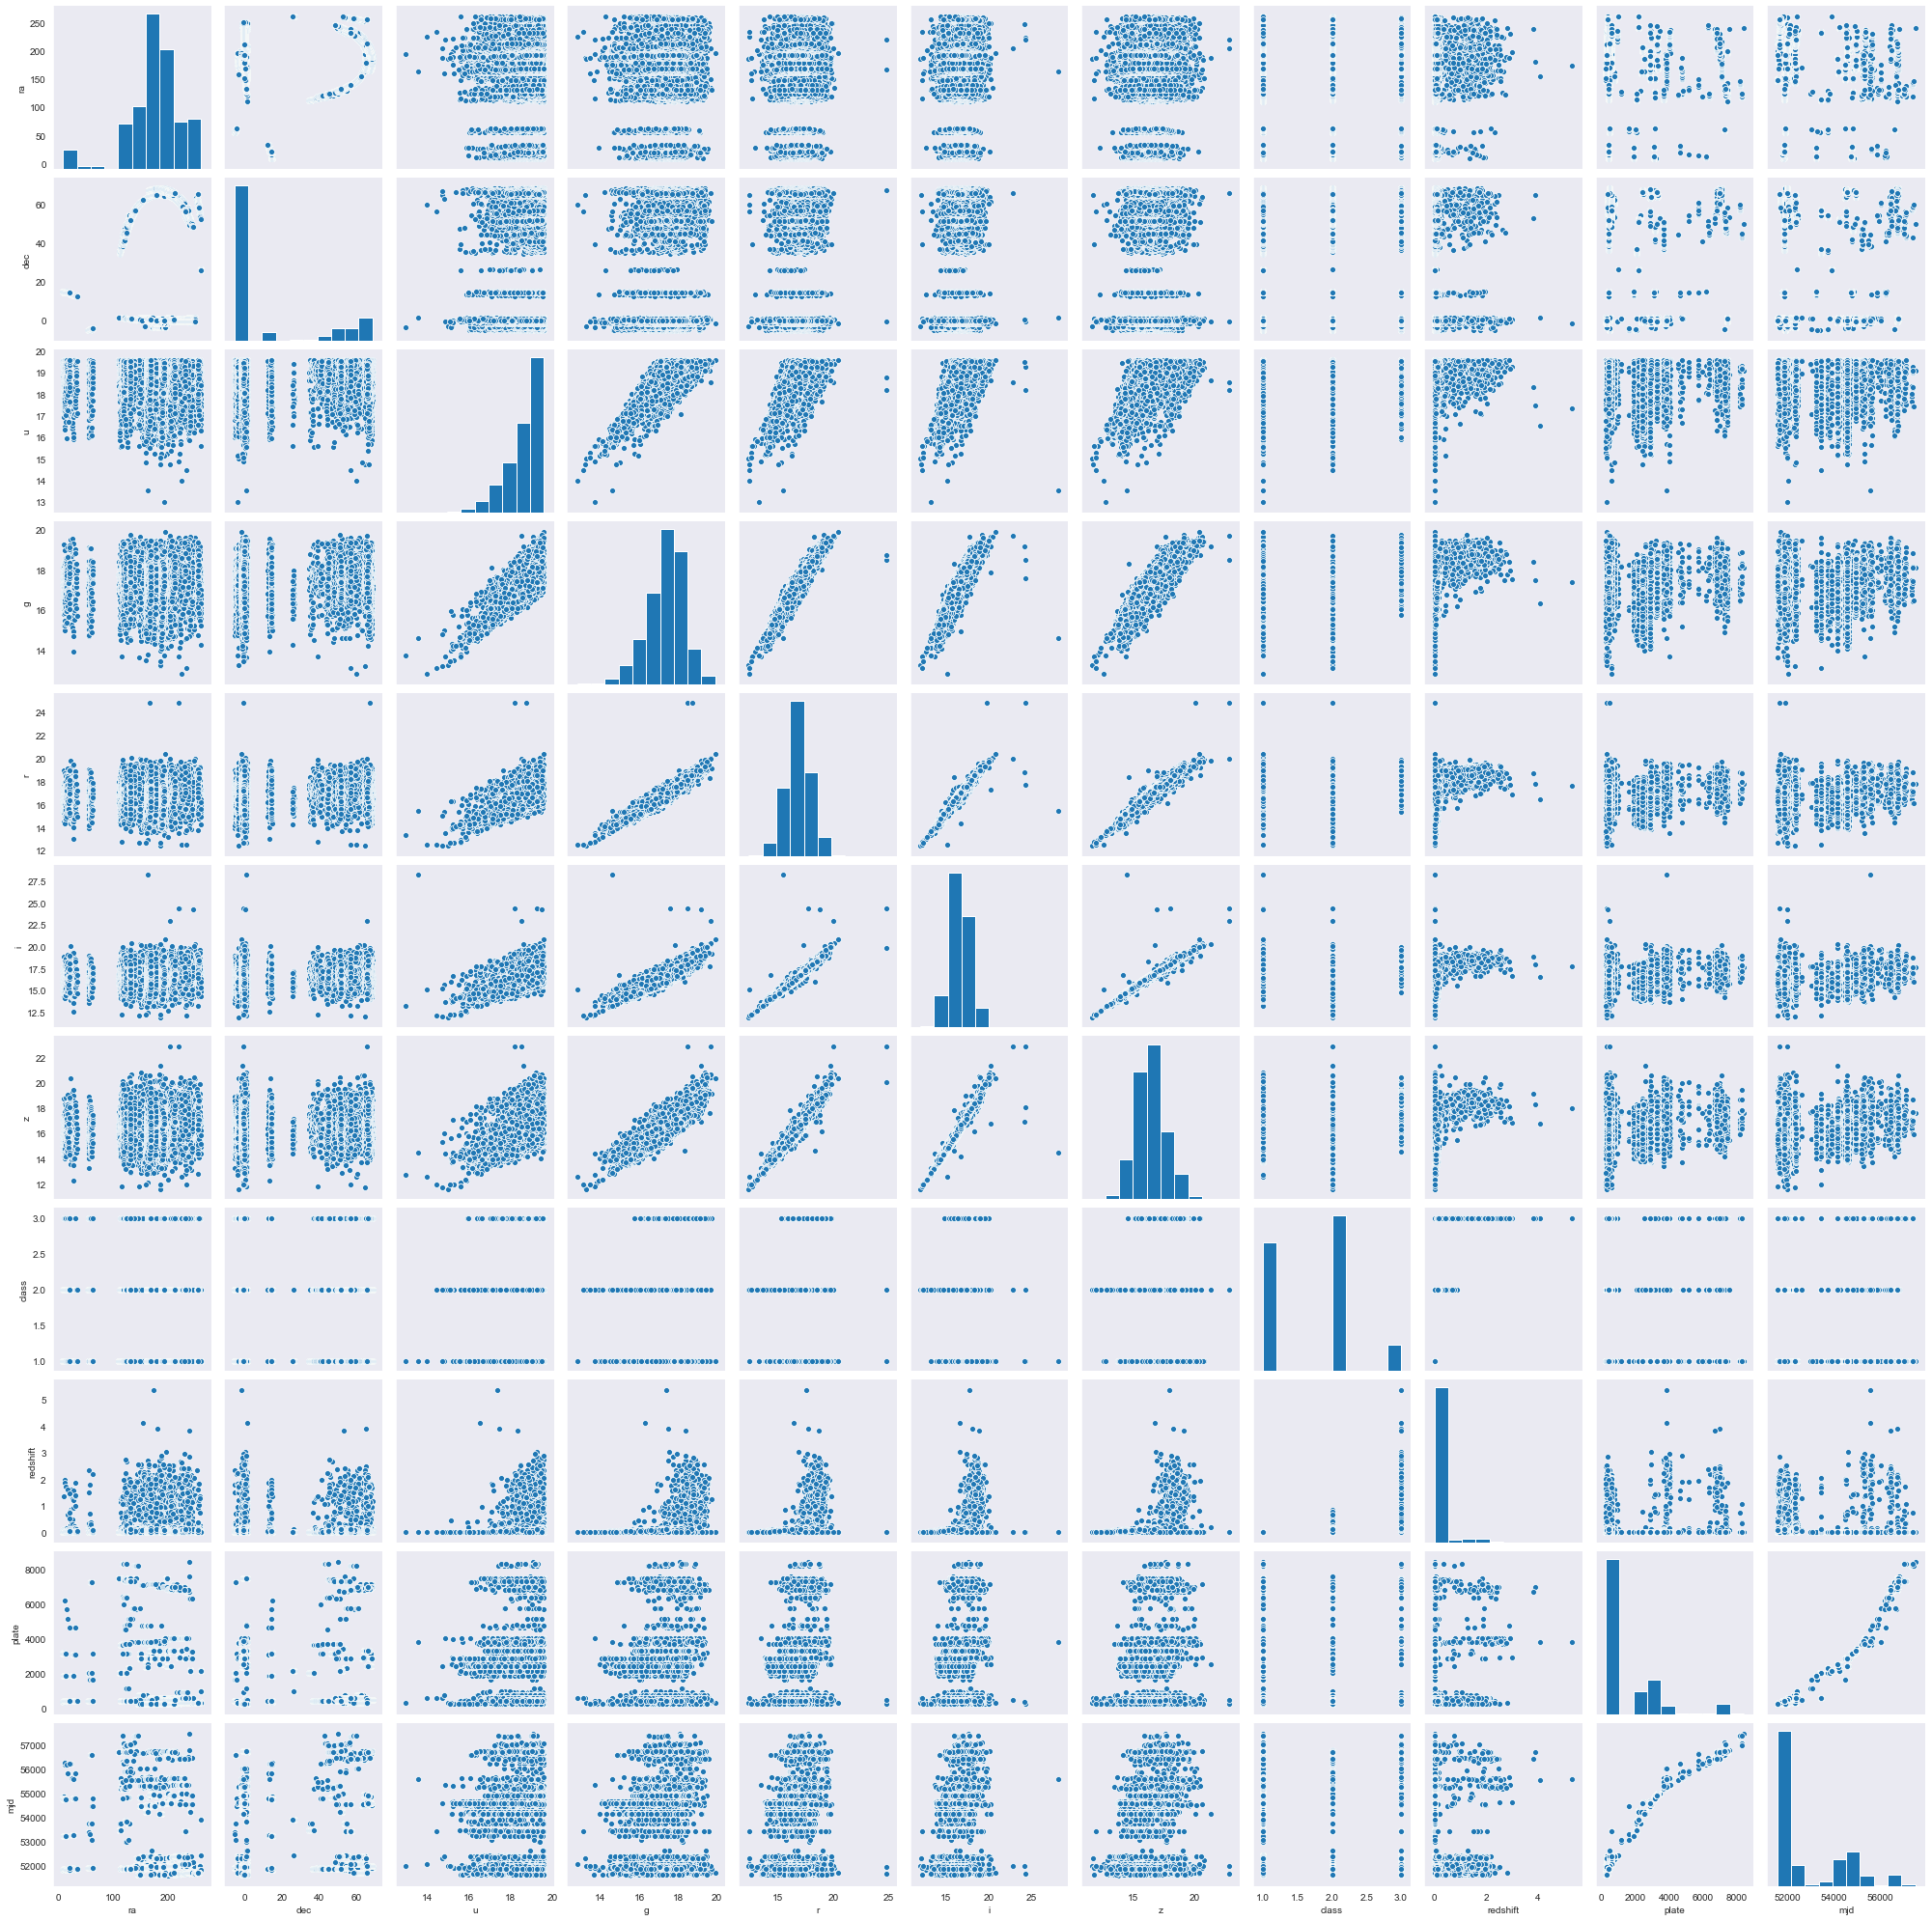

In [31]:
sb.pairplot(da)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [32]:
x=da.drop(['class'],axis=1)
y=da['class']

In [45]:
#Getting the shape of the x and variables

print(x)
print(y)
print(x.shape)
print(y.shape)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

      redshift  plate    mj

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=500)


We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [35]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [46]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
79.80000000000001
----------------------------------------
Confusion Matrix:
[[ 754  249    0]
 [  39 1241    0]
 [  51  166    0]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           1       0.89      0.75      0.82      1003
           2       0.75      0.97      0.85      1280
           3       0.00      0.00      0.00       217

    accuracy                           0.80      2500
   macro avg       0.55      0.57      0.55      2500
weighted avg       0.74      0.80      0.76      2500



In [37]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.9769698320915337
STD score: 0.005201515374813473

cross prediction [1. 1. 2. ... 1. 2. 2.]


In [50]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)

In [51]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
98.83999999999999
----------------------------------------
Confusion Matrix:
[[1000    3    0]
 [   0 1267   13]
 [   1   12  204]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1003
           2       0.99      0.99      0.99      1280
           3       0.94      0.94      0.94       217

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [52]:
#working on AdaBoostClassifier 
#training and testing data using AdaBoostClassifier

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)

In [53]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))


Accuracy score:
98.72
----------------------------------------
Confusion Matrix:
[[1001    2    0]
 [   4 1266   10]
 [   1   15  201]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1003
           2       0.99      0.99      0.99      1280
           3       0.95      0.93      0.94       217

    accuracy                           0.99      2500
   macro avg       0.98      0.97      0.97      2500
weighted avg       0.99      0.99      0.99      2500



In [42]:
#working on SVC 
#training and testing data using SVC

svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [49]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
79.80000000000001
----------------------------------------
Confusion Matrix:
[[ 754  249    0]
 [  39 1241    0]
 [  51  166    0]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           1       0.89      0.75      0.82      1003
           2       0.75      0.97      0.85      1280
           3       0.00      0.00      0.00       217

    accuracy                           0.80      2500
   macro avg       0.55      0.57      0.55      2500
weighted avg       0.74      0.80      0.76      2500



GridSearchCV for the best model

In [54]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

best score : 0.9769421579110175
best params : {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}


In [44]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'sdss.p')

['sdss.p']

# conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Electronic design automation and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib